In [96]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [119]:
base_path = "results/"
folders= ["share", "no_share"]
tests= ["multiplexer", "parity", "regression"]
runs = ["1", "2", "3", "4", "5"]

dfs = {}
for t in tests: 
    dfs[t] = {}
    for f in folders:
        dfs[t][f] = []
        for r in runs:
            file_name = base_path + f + "/diversity_" + t + "_"+ r + ".csv"
            df = pd.read_csv(file_name, sep=';')
            dfs[t][f].append(df)

dfs[t][f][0].head(2)

,gen,fitness,n_species,p_isomorphisms,unique_fitness,entropy,total_gen_markers,active_gen_markers,inactive_gen_markers,avg_delta,std_delta
0,0,71.993164,488,218,12,0.393132,22697,2221,21649,0.792869,0.023967
1,1,59.622877,307,220,17,0.550911,22386,2346,21263,0.781850,0.033612


In [114]:
def normalize_column(df, c_name):
    c = df[c_name]
    df[c_name] = (c-c.min())/(c.max()-c.min())

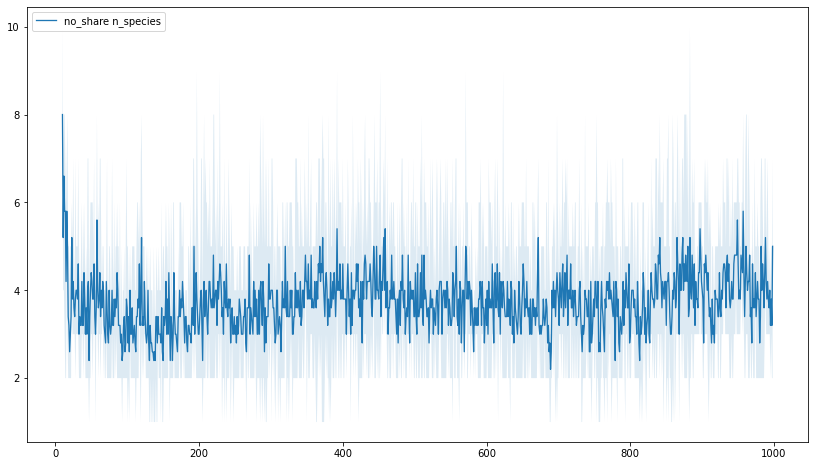

In [140]:
test = "regression"
cols = ["n_species"]
start = 10
finish = 999

for k, v in dfs[test].items():
    if k == "share":
        continue
    for column in cols:
        full_data = [d[column] for d in v]
        data = []
        for d in zip(*full_data):
            data.append(d)
        data = data[start:finish]
        avg_arr = [sum(d)/len(d) for d in data]
        min_arr = [min(d) for d in data]
        max_arr = [max(d) for d in data]

        steps = [i for i in range(start, finish)]

        plt.plot(steps, avg_arr, lw =1.3, label=f"{k} {column}")
        plt.fill_between(steps, min_arr,max_arr, alpha = 0.15)

plt.rcParams['figure.figsize'] = [14, 8]
plt.legend(loc="upper left")
plt.show()